In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [25]:
df=pd.read_excel("Customer_churn_clean_data.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df=df.drop(columns=["customerID"],errors="ignore")

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [30]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols, cat_cols


(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
       dtype='object'))

In [31]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded["Churn"] = le.fit_transform(df_encoded["Churn"])
df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [48]:
predictions = {}

for name, model in models.items():
    print("Training:",name)
    model.fit(X_train, y_train)
    print("Predicting:",name)
    preds = model.predict(X_test)
    predictions[name] = preds
    print(name,"done!")


Training: Logistic Regression
Predicting: Logistic Regression
Logistic Regression done!
Training: Decision Tree
Predicting: Decision Tree
Decision Tree done!
Training: Random Forest
Predicting: Random Forest
Random Forest done!
Training: XGBoost
Predicting: XGBoost
XGBoost done!


In [49]:
results = {}

for name, preds in predictions.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1_Score":f1,
        "Confussion_Matrix":cm
    }

In [56]:
for name, metrics in results.items():
    print("=====================================")
    print(f"Model: {name}")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1_Score:", metrics["F1_Score"])
    print("Confusion_Matrix:\n", metrics["Confussion_Matrix"])


Model: Logistic Regression
Accuracy: 0.8239886444286728
Precision: 0.6959247648902821
Recall: 0.5951742627345844
F1_Score: 0.6416184971098265
Confusion_Matrix:
 [[939  97]
 [151 222]]
Model: Decision Tree
Accuracy: 0.7686302342086586
Precision: 0.5765472312703583
Recall: 0.4745308310991957
F1_Score: 0.5205882352941177
Confusion_Matrix:
 [[906 130]
 [196 177]]
Model: Random Forest
Accuracy: 0.7963094393186657
Precision: 0.672
Recall: 0.450402144772118
F1_Score: 0.5393258426966292
Confusion_Matrix:
 [[954  82]
 [205 168]]
Model: XGBoost
Accuracy: 0.78708303761533
Precision: 0.6158730158730159
Recall: 0.5201072386058981
F1_Score: 0.563953488372093
Confusion_Matrix:
 [[915 121]
 [179 194]]


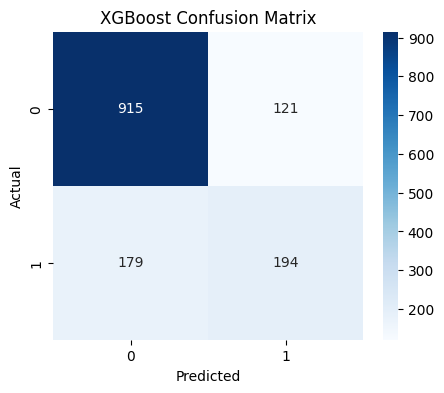

In [57]:
cm = confusion_matrix(y_test, predictions['XGBoost'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

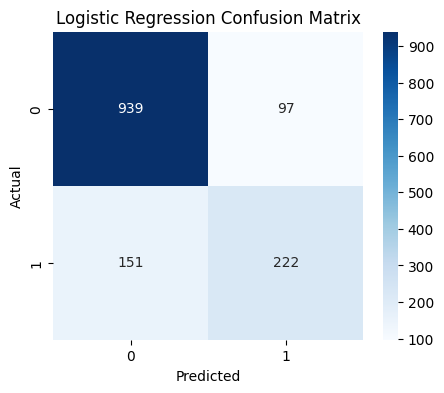

In [59]:
cm = confusion_matrix(y_test, predictions['Logistic Regression'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

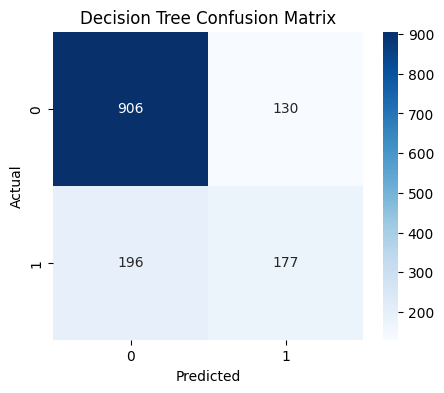

In [62]:
cm = confusion_matrix(y_test, predictions['Decision Tree'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

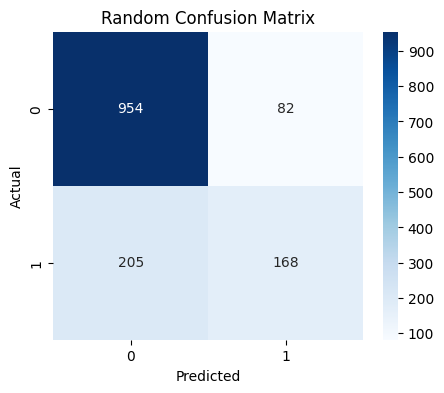

In [64]:
cm = confusion_matrix(y_test, predictions['Random Forest'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Confusion Matrix')
plt.show()

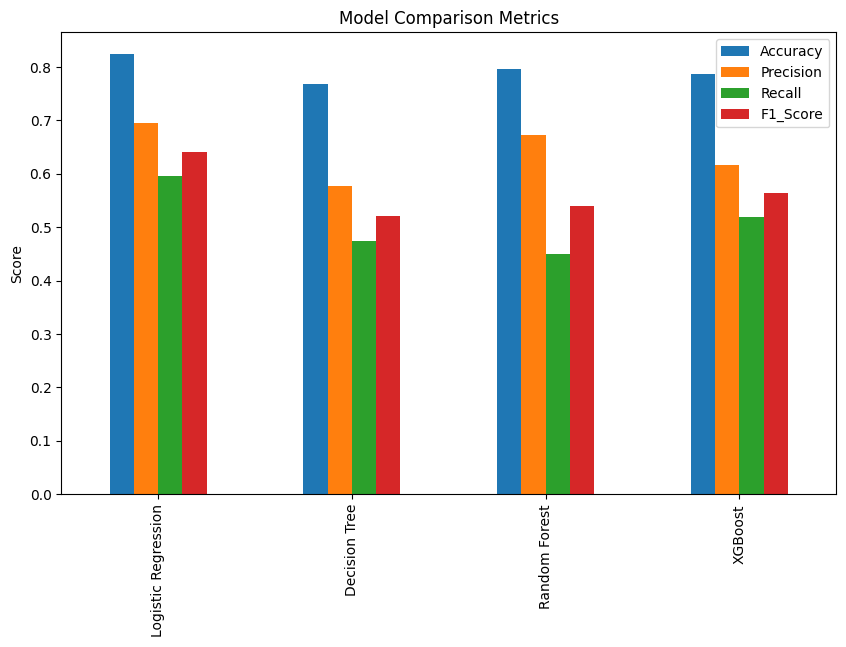

In [58]:
metrics_df = pd.DataFrame(results).T  # transpose
metrics_df[['Accuracy','Precision','Recall','F1_Score']].plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison Metrics')
plt.ylabel('Score')
plt.show()